<a href="https://colab.research.google.com/github/jzj5528/ST-Louis-Vacancy-Project-/blob/main/VacantHomes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import folium
import matplotlib.pyplot as plt
import seaborn as sns
# magic word for producing visualizations in notebook
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
df = pd.read_csv('/content/gdrive/My Drive/BoozAllenHamilton/AllVacantLotsData.csv')

In [4]:
df.head()

,Handle,StAddrNum,StNameFull,Zip,Ward20,Ward10,NhdName,CensTract20,CensTract10,Lat,...,BurdenCat,BoardUp,IsLRA,TaxYrsDel,VacRegMonths,VioMajor,CSBVacancy,CSBNuisance,Forestry,Condemned
0,10338000030,914,ST LOUIS AV,63102,14.0,2,Near North Riverfront,1266.0,1266.0,38.65261,...,Zero,NaN,NaN,0,0,0,True,NaN,NaN,NaN
1,10688000011,110,CASS AV,63102,14.0,5,Near North Riverfront,1257.0,1257.0,38.63844,...,Minimal,NaN,NaN,0,0,0,True,True,NaN,NaN
2,10848000025,2704,S 11TH ST,63118,8.0,9,Soulard,1276.0,1276.0,38.60046,...,Zero,NaN,NaN,0,0,0,True,NaN,NaN,NaN
3,10942000120,1926,DELMAR BLVD,63103,14.0,19,Downtown West,1275.0,1275.0,38.63522,...,Minimal,NaN,NaN,0,0,0,True,True,NaN,NaN
4,11001000240,2837,DAYTON ST,63106,14.0,3,Jeff Vanderlou,1212.0,1212.0,38.64233,...,Zero,NaN,NaN,0,0,0,True,NaN,NaN,NaN


In [5]:
df.dtypes

Handle            int64
StAddrNum         int64
StNameFull       object
Zip               int64
Ward20          float64
Ward10            int64
NhdName          object
CensTract20     float64
CensTract10     float64
Lat             float64
Lng             float64
Type             object
ParcelSqFt        int64
OwnerName        object
OwnerName2       object
OwnerState       object
OwnerZip        float64
OwnerChange      object
BldgAge         float64
Vacancy           int64
VacancyCat       object
Burden            int64
BurdenCat        object
BoardUp          object
IsLRA            object
TaxYrsDel         int64
VacRegMonths      int64
VioMajor          int64
CSBVacancy       object
CSBNuisance      object
Forestry         object
Condemned        object
dtype: object

In [6]:
pd.value_counts(df['BurdenCat'])[:15]

Extremely High    5075
High              4984
Very High         3558
Zero              3324
Minimal           2585
Very Low          2495
Low               1356
Medium Low         914
Medium             711
Medium High        596
Somewhat High      463
Name: BurdenCat, dtype: int64

In [7]:
pd.value_counts(df['Type'])[:15]

Empty Lot        14714
Single-Family     6487
Duplex            2874
Commercial         939
Multi-Unit         887
Mixed-Use          156
Other                4
Name: Type, dtype: int64

In [8]:
pd.value_counts(df['VacancyCat'])[:15]

Definite         14676
Very Likely       9957
Indeterminant     1261
Possible           167
Name: VacancyCat, dtype: int64

In [9]:
pd.value_counts(df['Condemned'])[:15]
#Only 2,014 Properties are condemned

True    2014
Name: Condemned, dtype: int64

In [10]:
pd.value_counts(df['IsLRA'])[:15]
#10,048 vacant properties are LRA owned

True    10048
Name: IsLRA, dtype: int64

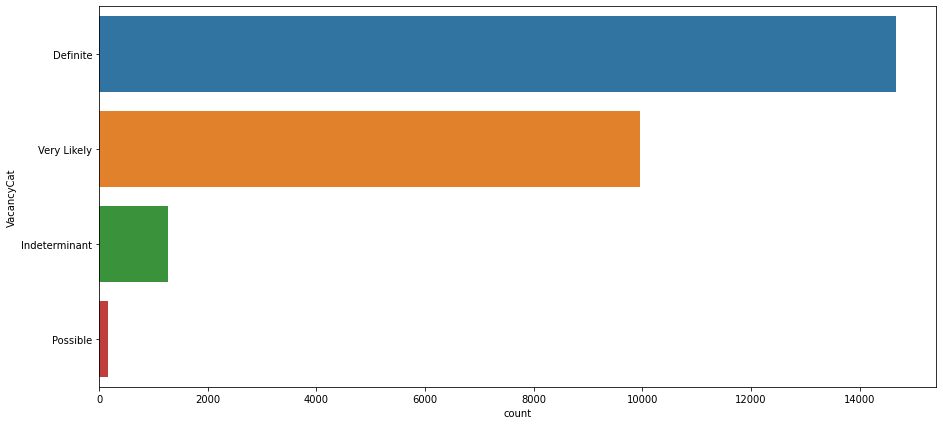

In [11]:
plt.figure(figsize = (15, 7))
sns.countplot(y = df['VacancyCat'],order=df['VacancyCat'].value_counts().iloc[:10].index)

# Mini-Data Cleaning

In [12]:
# Turns Lat and Lng into strings
df['Lat'] = df['Lat'].astype(str)
df['Lng'] = df['Lng'].astype(str)

In [15]:
df['LATLNG'] = df['Lat'] + ", " + df['Lng']

In [16]:
df.drop(df[df['LATLNG']=='0'].index, inplace=True)
count=0
for i in range(len(df.LATLNG)):
    if df.LATLNG.iloc[i]=='0':
        count+=1
print('After droping,the number of 0 is:',count)

After droping,the number of 0 is: 0


In [17]:
df.drop(df[df['LATLNG']=='nan, nan'].index, inplace=True)
count=0
for i in range(len(df.LATLNG)):
    if df.LATLNG.iloc[i]=='nan, nan':
        count+=1
print('After droping,the number of nan, nan is:',count)

After droping,the number of nan, nan is: 0


In [18]:
#convert LATLNG from string to tuple
new_LNGLAT=[]
for i in range(len(df)):
    a=df['LATLNG'].iloc[i]
    lat, lon = a.split(',')
    new_LNGLAT.append((float(lat),float(lon)))

df['LATLNG']=new_LNGLAT

In [19]:
df['StNameFull'] = df['StNameFull'].astype(str)


In [20]:
df['StAddrNum'] = df['StAddrNum'].astype(str)

In [15]:
df.dtypes

Handle            int64
StAddrNum        object
StNameFull       object
Zip               int64
Ward20          float64
Ward10            int64
NhdName          object
CensTract20     float64
CensTract10     float64
Lat              object
Lng              object
Type             object
ParcelSqFt        int64
OwnerName        object
OwnerName2       object
OwnerState       object
OwnerZip        float64
OwnerChange      object
BldgAge         float64
Vacancy           int64
VacancyCat       object
Burden            int64
BurdenCat        object
BoardUp          object
IsLRA            object
TaxYrsDel         int64
VacRegMonths      int64
VioMajor          int64
CSBVacancy       object
CSBNuisance      object
Forestry         object
Condemned        object
dtype: object

In [21]:
df['address']=df['StAddrNum']+" "+df['StNameFull']+", St.Louis"

In [36]:
#count the incident frenquency to each location
unique_locations = df['LATLNG'].value_counts()

PB_index = pd.DataFrame({"LATLNG" : unique_locations.index, "ValueCount":unique_locations})
PB_index.index = range(len(unique_locations))
#map_data=pd.concat([new_df['address'],PB_index], axis=1, join='inner')
map_data=pd.concat([df[['address']],PB_index], axis=1, join='inner')
map_data_head=map_data[:10]
map_data.head()

,address,LATLNG,ValueCount
0,"914 ST LOUIS AV, St.Louis","(38.65261, -90.19263)",1
1,"110 CASS AV, St.Louis","(38.66056, -90.25787)",1
2,"2704 S 11TH ST, St.Louis","(38.66396, -90.26483)",1
3,"1926 DELMAR BLVD, St.Louis","(38.65992, -90.25832)",1
4,"2837 DAYTON ST, St.Louis","(38.65978, -90.25803)",1


In [25]:
stl_Vacant_Homes=folium.Map(location=[38.6, -90.2],
                        zoom_start=13,width=1000, height=800)

In [26]:
stl_Vacant_Homes

In [31]:
for i in range(10):
    lat = map_data['LATLNG'].iloc[i][0]
    long = map_data['LATLNG'].iloc[i][1]
    location=map_data['address'].iloc[i]
    if map_data['ValueCount'].iloc[i] > 0:
        color = 'red'
    
    popup_text = """
                Location: {}<br>
                Peace Disruptions : {}<br>"""
    popup_text = popup_text.format(
                               location, 
                               map_data['ValueCount'].iloc[i]
                               )
    folium.Marker(location = [lat, long], popup= popup_text,icon=folium.Icon(color= color)).add_to(stl_Vacant_Homes)

In [32]:
stl_Vacant_Homes